# Assignment 2:  Ephemeris of Earth

Numerically integrate the Earth’s orbit around the sun. Use the initial conditions from
https://ssd.jpl.nasa.gov/horizons.cgi#top- with ephemeris type “vectors”, target body “earth”,
and coordinate origin sun. 

Explicitly define your code verification variables; calculate them as
well, and try to integrate for a million years (I think this is feasible both with computing time and
with precision- but if it is not go as long as you can with the computing power you have
available). Plot the eccentricity of the orbit and the time of perihelion and aphelion over that
period.

In developing your model and doing your calculations, it is useful to do everything in terms of vectors (and use built in functions for vector operations instead of dealing with individual components).


In [268]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import scipy

Calculate and plot the solar-energy fluxes: a) for the entire earth and b) for the northern
hemisphere over the period you are able to integrate. (Ignore reflections, clouds, etc.). 

Don't do this for every year- but make a reasonable sample (say every N years), where N is picked so that there are a few plots covering the interesting regions.


In [269]:
mass_earth = 5.9736e24
mass_sun = 1.9885e30
G = 6.67408e-11

abs_position_earth_sun = [
    1.498994926947174E08*1000,
    6.157962886642456E06*1000,
    -8.865554281636141E02*1000
]

abs_velocity_earth_sun = [
    -1.701659572291657E00*1000,
    2.966166838386400E01*1000,
    -2.224382206183151E-03*1000
]

abs_position_earth_sun = np.array([1.261436452049762E+08,
                         7.883265093888247E+07,
                         -4.303152865413576E+03
                         ])*1000

abs_velocity_earth_sun = np.array([-1.627401812602464E+01, 
                         2.516169581012232E+01,
                         -1.284592969357234E-03
                         ])*1000






In [270]:
def main(y, t, m1 = mass_earth, m2 = mass_sun): 
    planet1_x = y[0:3]
    planet2_x = y[3:6]
    planet1_dx = y[6:9]
    planet2_dx = y[9:12]
    
    F21 = NewtonLaw(planet1_x, planet2_x, mass_sun)
    F12 = NewtonLaw(planet2_x, planet1_x, mass_earth)
    
    dxdt = np.zeros(12)
    
    dxdt[0:3] = planet1_dx
    dxdt[3:6] = planet2_dx
    dxdt[6:9] = F21
    dxdt[9:12] = F12
    
    return dxdt

In [271]:
def NewtonLaw(r1, r2, m_source): 
    distance = np.linalg.norm(r2-r1)
    direction = (r1-r2)/distance    
    F = -(G*m_source/distance**2)*direction
    return F

Now add Jupiter and calculate the three body system. Compare the Earth’s orbit and the solar
fluxes to those you would get without Jupiter present.


In [272]:
def center_of_mass(abs_position, abs_velocity, m1 = mass_earth, m2 = mass_sun):
    '''Returns the position vectors in the center of mass frame.
    
    Input: 
    - absolute distance between planets (tuple)
    - absolute velocity between planets (tuple)
    
    Output:
    - position and velocity in the center of mass frame as the initial condition.
    '''
    
    planet1_x0 = []
    planet2_x0 = []
    
    planet1_dx0 = []
    planet2_dx0 = []
    
    
    for x_i in abs_position:
        A = np.array([
                     [m1/m2, 1],
                      [1, -1]
                      ])
        b = np.array([[0],[x_i]])
        x = scipy.linalg.solve(A, b)
        val_1, val_2 = x        
        
        planet1_x0.append(val_1)
        planet2_x0.append(val_2)
        
    for dx_i in abs_velocity:
        A = np.array([[m1/m2, 1],
                      [1, -1]
                      ])
        b = np.array([[0],[dx_i]])
        
        x = scipy.linalg.solve(A, b)
        val_1, val_2 = x      
    
        planet1_dx0.append(val_1)
        planet2_dx0.append(val_2)
    
    initial_cond = np.zeros(12)
    initial_cond[0:3] = planet1_x0
    initial_cond[3:6] = planet2_x0
    initial_cond[6:9] = np.array(planet1_dx0).reshape(3)
    initial_cond[9:12] = np.array(planet2_dx0).reshape(3)
    
    return initial_cond

In [273]:
initial_cond = center_of_mass(abs_position_earth_sun, abs_velocity_earth_sun)
initial_cond

array([ 1.26143266e+11,  7.88324141e+10, -4.30313994e+06, -3.78943634e+05,
       -2.36818360e+05,  1.29269483e+01, -1.62739692e+04,  2.51616202e+04,
       -1.28458911e+00,  4.88881985e-02, -7.55873546e-02,  3.85900000e-06])

In [274]:
year = 3.154e+7
day = 86400
au = 149597870700

t = np.linspace(0, 1*year, num=1000)

from scipy.integrate import odeint
sol = odeint(main, initial_cond, t,rtol=1e-11,atol=1e-11)
sol

array([[ 1.26143266e+11,  7.88324141e+10, -4.30313994e+06, ...,
         4.88881985e-02, -7.55873546e-02,  3.85900000e-06],
       [ 1.25626940e+11,  7.96252164e+10, -4.34360968e+06, ...,
         4.93696882e-02, -7.52843173e-02,  3.84246380e-06],
       [ 1.25105563e+11,  8.04148174e+10, -4.38390480e+06, ...,
         4.98493354e-02, -7.49781632e-02,  3.82576821e-06],
       ...,
       [ 1.28043625e+11,  7.58160676e+10, -4.14906539e+06, ...,
         4.70572196e-02, -7.67013362e-02,  3.91988388e-06],
       [ 1.27546506e+11,  7.66206396e+10, -4.19017818e+06, ...,
         4.75454667e-02, -7.64101403e-02,  3.90395364e-06],
       [ 1.27044265e+11,  7.74221346e+10, -4.23112270e+06, ...,
         4.80319499e-02, -7.61157885e-02,  3.88786184e-06]])

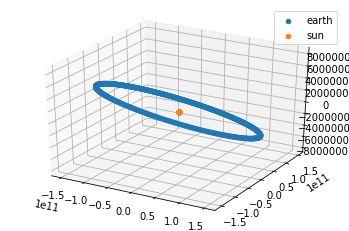

In [275]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(sol[:, 0], sol[:, 1], sol[:, 2], label='earth')
ax.scatter(sol[:, 3], sol[:, 4], sol[:, 5], label='sun')
ax.legend()



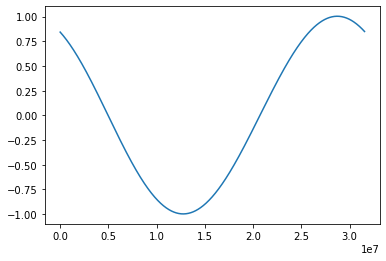

In [276]:
plt.plot(t, sol[:, 0]/au)
#plt.plot(t, sol[:, 1])
#plt.plot(t, sol[:, 2])